# Predicting Newsletter Subscription: Analyzing Player Age and Gameplay Hours

# 1. Introduction 

## 1.1 Background Information 

In the gaming industry, newsletters are important for keeping players up to date with new information. These letters help maintain engagement by reaching players outside of the game itself. However, not all players subscribe, and understanding what factors contribute to that can be valuable for improving engagement.
    
Player characteristics such as age and how many hours a person plays often influence their level of involvement in a game. Players who spend more time in a game might be more invested and therefore more likely to want updates. Age can also affect communication preferences and level of interest. By studying these factors, game companies can better understand what motivates players to stay connected and how game companies can target different groups of people. 

## 1.2 Big Question

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

## 1.3 Specific Question

Can the **age** and **hours played** of predict whether a given player **subscribes** to a game-related newsletter? How do the **age** and **hours played** vary between different **experience** levels of players?

## 1.4 Dataset Description 

The dataset used for this project is a course provided dataset for the purpose of practicing data analysis. It contains 196 rows and 7 columns. Each row represents a single player and each column represents a different variable. 

|Variable Name|Data Type|Explanation|
|---|---|---|
|experience|character|Categorizes the player's experience with Minecraft|
|subscribe|logical|Is the player subscribed to a game-related newsletter?|
|hashedEmail|character|The email of the player, hashed to maintain privacy|
|played_hours|double|How many total hours the player has spent on the server|
|name|character|The name of the player|
|gender|character|The gender of the player|
|Age|double|The integer age of the player|

*Figure 1: Table of each Variable, their datatype, and a short explanation of what it represents*

For this project, the analysis focused on the following key variables: 
- Age : A numerical value indicating how old each player is 
- Played_hours: A numerical value showing the total number of hours played in game 
- Subscribe: A binary variable indicating whether the player subscribed to the newsletter (TRUE or FALSE).

## 1.5 How the Data was Collected

The columns in the player data, other than the hours played, was collected by a survey. The survey was conducted upon signing up to participate in the study and to play on the Minecraft server. The hours played was tracked by the Minecraft server and the researchers conducting the study. 

# 2. Methods

## 2.1 Load in Libraries and Set Seed

In order to run our analysis, we load in the Tidyverse and Tidymodels libraries. To make our analysis reproducible, we set the seed to a specific number. We use the set.seed function to do this. 

In [97]:
# load libraries
library(tidyverse)
library(tidymodels)

In [98]:
# set seed
set.seed(4321)

## 2.2 Load the Data

We load in the players.csv file for our analysis, storing the resulting dataframe as a variable. We print the first few rows of it. 

In [99]:
players <- read_csv("https://raw.githubusercontent.com/Jchox2/Project-008-24-DSCI/refs/heads/main/players.csv")
# head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


|experience|subscribe|hashedEmail|played_hours|name|gender|Age|
|---|---|---|---|---|---|---|
|Pro |TRUE	|f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d	|30.3	|Morgan 	|Male 	|9|
|Veteran	|TRUE	|f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9	|3.8	|Christian	|Male 	|17|
|Veteran	|FALSE	|b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28	|0.0	|Blake 	|Male 	|17|
|Amateur	|TRUE	|23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5	|0.7	|Flora 	|Female	|21|
|Regular	|TRUE	|7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e	|0.1	|Kylie 	|Male 	|21|
|Amateur	|TRUE	|f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977	|0.0	|Adrian 	|Female	|17|

*Figure 2: The first 6 Rows of `players.csv`*

## 2.3 Wrangle and Clean the Data

To ensure our classification model runs error-free, the `experience` and `subscribe` columns are changed to a `factor` dataype.

In [100]:
players <- mutate(players, experience = as_factor(experience), subscribe = as_factor(subscribe)) |> drop_na(Age)

## 2.4 Summary Statistics

We use the `summarize` function to output:
- the **mean** of the `Age` and `played_hours` columns, ignoring NA values, denoted by the `Avg_age` and `Avg_played_hours` columns;
- the **max/min** of the `Age` and `played_hours` columns, ignoring NA values, denoted by the `Max/Min_age` and `Max/Min_played_hours` columns;
- the **count** of "TRUE" and "FALSE" in the `subscribe` column, denoted by the `cnt_subscribe` column;
- and the **count** of each type of player in the `experience` column, denoted by the `cnt_experience` column.

In [101]:
averages <- summarize(players, 
                     Avg_age = mean(Age, na.rm = TRUE),
                     Avg_played_hours = mean(played_hours, na.rm = TRUE), 
                    )

extreme_vals <- summarize(players, 
                    Max_age = max(Age, na.rm = TRUE),
                     Min_age = min(Age, na.rm = TRUE),
                     Max_played_hours = max(played_hours, na.rm = TRUE),
                     Min_played_hours = min(played_hours, na.rm = TRUE),
                          )

cnt_subscribe <- players |>
    group_by(subscribe) |>
    summarize(count_subscribe = n())

cnt_experience <- players |>
    group_by(experience) |>
    summarize(count_experience = n())

averages
extreme_vals
cnt_subscribe
cnt_experience

Avg_age,Avg_played_hours
<dbl>,<dbl>
21.13918,5.904639


Max_age,Min_age,Max_played_hours,Min_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
58,9,223.1,0


subscribe,count_subscribe
<fct>,<int>
FALSE,52
TRUE,142


experience,count_experience
<fct>,<int>
Pro,13
Veteran,48
Amateur,63
Regular,35
Beginner,35


*Figure 3.1-3.4: Tables of each series of summary statistics mentioned above*

## 2.5 Exploratory Visualization to Answer the Second Portion of the Main Question

4 plots were made. The first and second plots were scatter plots of `Age` vs. `played_hours`, with the second plot having data points within 0 to 8 hours played. The third and fourth plots similarly follow this same pattern, except they are `facet_grids` containing a scatter plot for each type of player. 

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


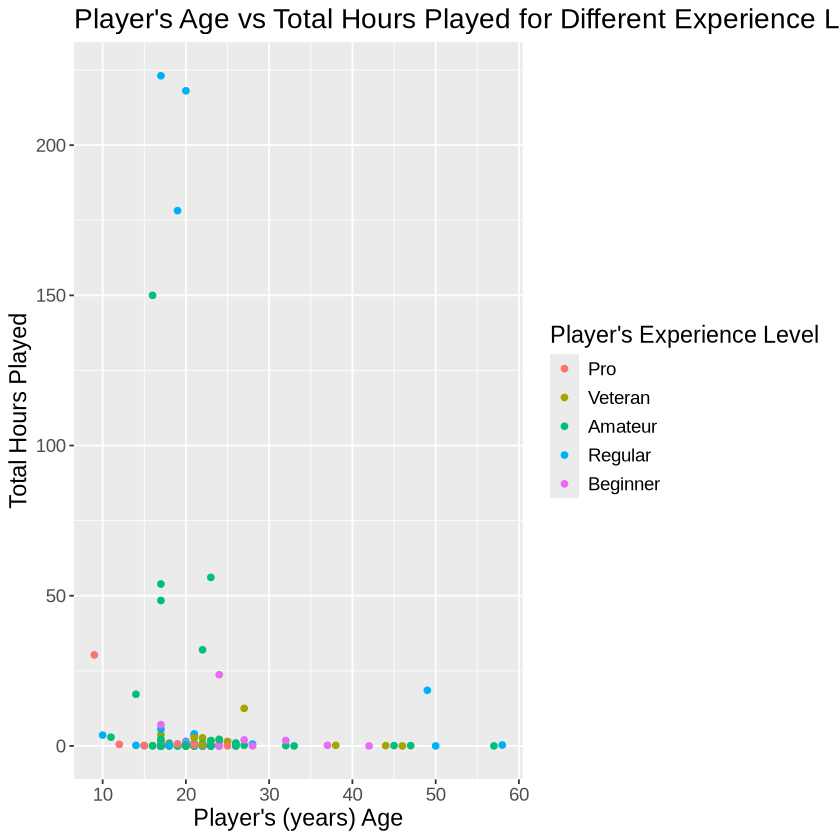

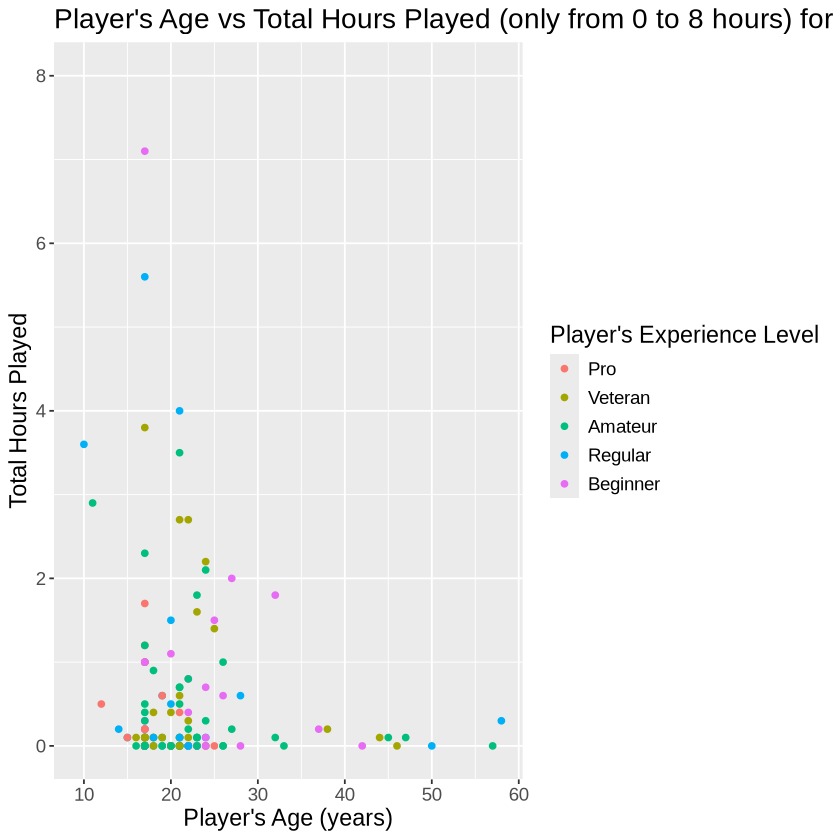

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


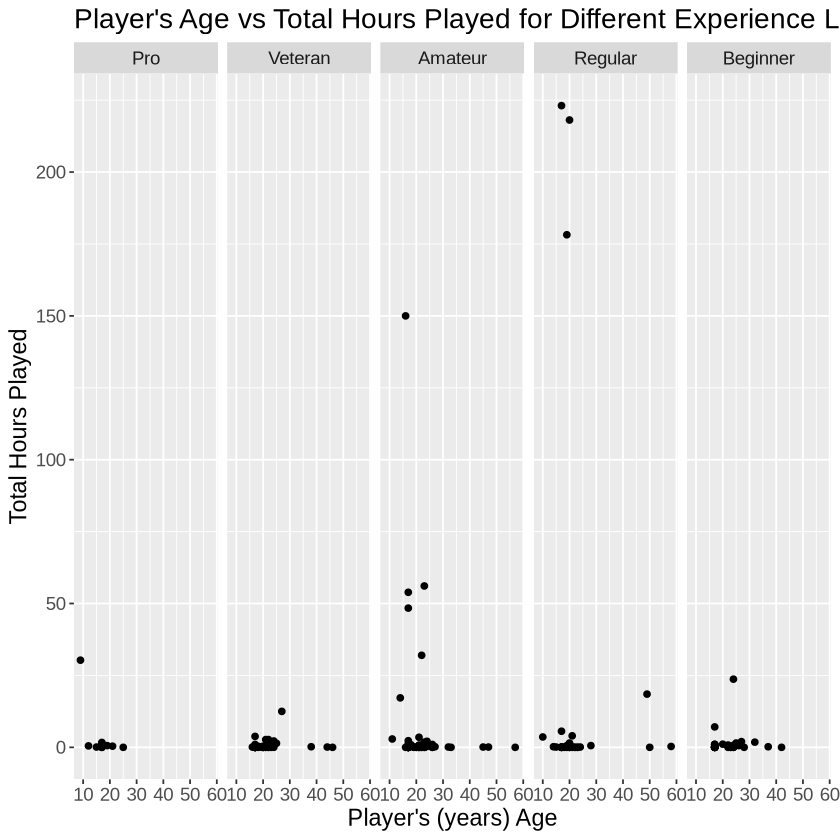

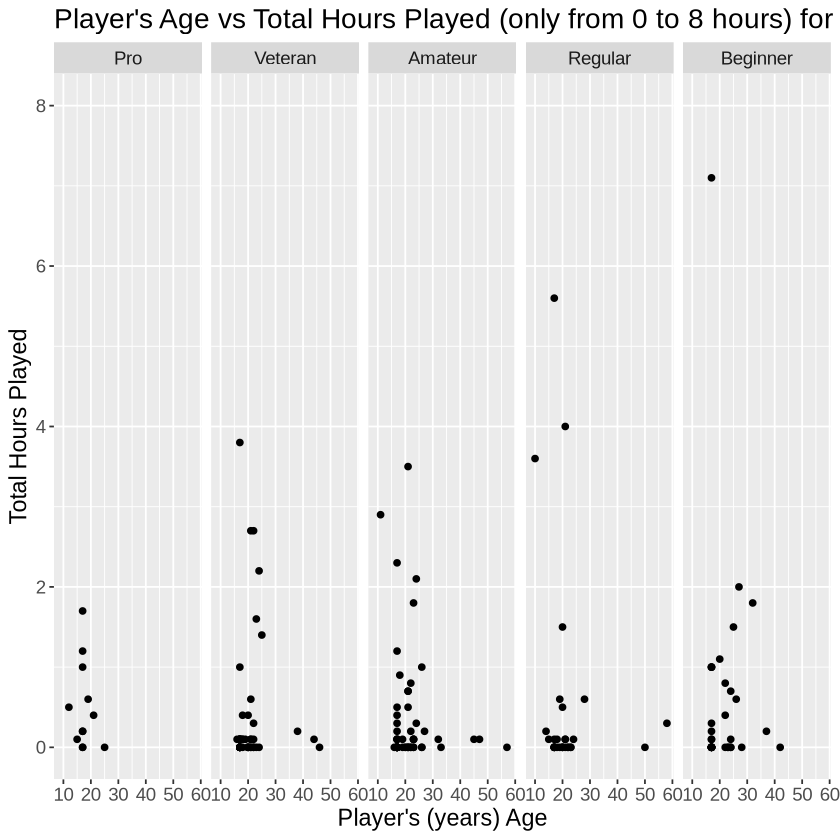

In [102]:
plot1 <- ggplot(players, aes(x = Age, y = played_hours, color = experience)) + 
    geom_point() + 
    theme(text = element_text(size = 14))

plot2 <- plot1 + 
    labs(x = "Player's Age (years)", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels", 
        color = "Player's Experience Level") + 
    ylim(c(0, 8))

plot3 <- ggplot(players, aes(x = Age, y = played_hours)) + 
    geom_point() + 
    facet_grid(cols = vars(experience)) + 
    theme(text = element_text(size = 14))

plot4 <- plot3 + 
    labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels") +
    ylim(c(0, 8))
plot1 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels", 
        color = "Player's Experience Level")
plot2
plot3 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels")
plot4

*Figure 4: Exploratory Data Analaysis Plots (details mentioned above)*

## 2.6 KNN Classification

### 2.6.1 Split the Data

Typically train/test data splits range from 70/30 to 80/20. We use 70/30 as there are less than 200 data points, and we want to minimize skewedness in the testing dataset due to low sample size. We set `strata` to `subscribe` to stratify the subscribe column in both subsets of the data.

In [103]:
data_split <- initial_split(players, prop = 0.70, strata = subscribe)
players_testing <- testing(data_split)
players_training <- training(data_split)

### 2.6.2 Preprocess the Data

We standardize the `age` and `played_hours` columns by creating a standardization preprocessor. We assume that both play an equal role in influencing one's decision to subscribe to a game-related newsletter for simplicity. This preprocessor will be used for the testing data later as well.

In [104]:
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

### 2.6.3 Optimizing K using Cross-Validation

We perform 10-fold cross-validation for each K from 1 to 100 on the training dataset to find the best K. 10-fold is used as our computational power is limited, but accuracy in calculating the model's performance is still significant. We limit K at 100 as the dataset includes less than 200 data points. 

In [105]:
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

We make our model specification for tuning K. 

In [106]:
players_tune_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [107]:
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 1))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4663411,5,0.035180801,Preprocessor1_Model01
2,accuracy,binary,0.4663411,5,0.035180801,Preprocessor1_Model02
3,accuracy,binary,0.5270452,5,0.031773551,Preprocessor1_Model03
4,accuracy,binary,0.5267603,5,0.025368649,Preprocessor1_Model04
5,accuracy,binary,0.5701465,5,0.025521830,Preprocessor1_Model05
6,accuracy,binary,0.5627391,5,0.032165549,Preprocessor1_Model06
7,accuracy,binary,0.5857957,5,0.034039179,Preprocessor1_Model07
8,accuracy,binary,0.5781034,5,0.036981446,Preprocessor1_Model08
9,accuracy,binary,0.5413105,5,0.031906924,Preprocessor1_Model09


*Figure 5: Table of Accuracies for K = 1 to 20*

We choose **K = 15**. It has a high accuracy among the K values, and changing K to a nearby value does not drastically change the accuracy, but it still changes it slightly. If we choose a higher K value, it would likely be an overfit, as the accuracy stops changing after K = 21. We choose a lower K to reduce computational intensity.

### 2.6.4 Define the Optimized Classifier and Predict on Testing Data

We define our optimized classifier, and fit the model to our training data. Then, it is tested on our training data, using an accuracy measurement. The results are outputted. 

The general measurement of accuracy is used as the big question is "which features are most predictive." There are no preferred predictions, hence no "positive" or "negative" outcomes, which is why using recall and/or precision is not justifiable. 

In [108]:
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_test_predictions <- predict(knn_fit, players_testing) |>
  bind_cols(players_testing)

acc <- players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

## 2.7 Visualize the Predictions

We make a scatter plot of predicted age vs played_hours, colour-coding whether someone is subscribed or not to a game-related newsletter. 

In [109]:
sc1 <- ggplot(players_test_predictions, aes(x = Age, y = played_hours)) + 
    geom_point(aes(colour = .pred_class)) + 
    labs(y = "Hours Played", title = "Age vs. Hours Played (Predicted Subscribe Column)", colour = "Subscribed?") + 
    theme(text = element_text(size = 14))

sc2 <- ggplot(players_test_predictions, aes(x = Age, y = played_hours)) + 
    geom_point(aes(colour = subscribe)) +
    labs(y = "Hours Played", title = "Age vs. Hours Played (Actual Subscribe Column)", colour = "Subscribed?") + 
    theme(text = element_text(size = 14))

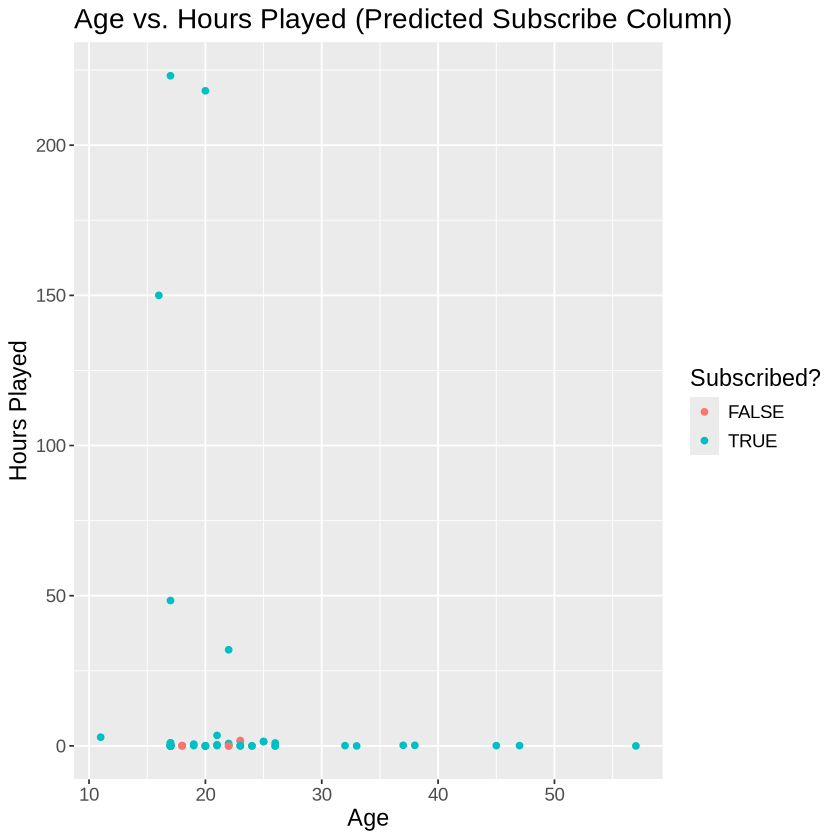

In [110]:
sc1

*Figure 6: A scatterplot of Age vs. Hours Played, with colours differentiating the predicted subscribe column*

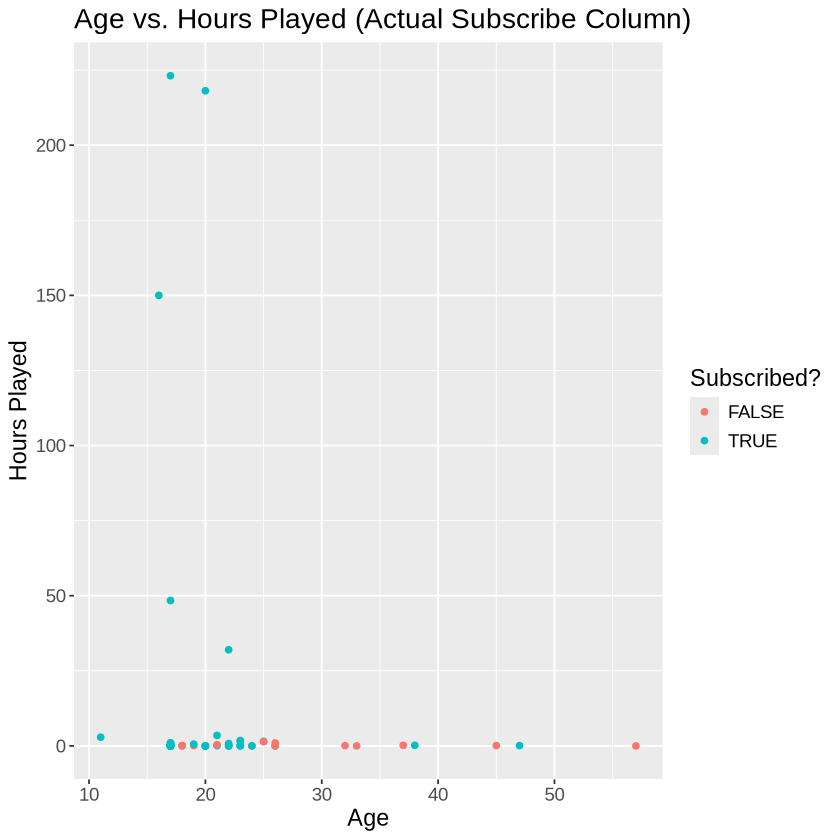

In [111]:
sc2

*Figure 7: A scatterplot of Age vs. Hours Played, with colours differentiating the actual subscribe column*

# 3. Results

## 3.1 Differences Among Player Types

All plots in Figure 3 did not show any clear trend between the types of players. The first plot showed a slight inverse relationship at the top, and a cluster of points near the bottom, showing that a large portion of players played very few hours, with some outliers. The second plot, limiting the y-axis, more clearly shows the inverse relationship in the bottom cluster. The third and fourth plots similarly showed an inverse relationship, with a tendency to cluster a majority of points near the bottom left. 

## 3.2 KNN Classification Model

| Accuracy on Training Data | Accuracy on Testing Data |
| ---|---|
|0.7263126| 0.7288136|

*Figure 8: Accuracies of our model on the training data and testing data.*

As seen in Figure 8, our model performed with similar accuracy on both the training and testing data. However, comparing Figure 6 and 7 illustrates that the model likely did not learn the proper trends of the data, as the only red points in Figure 6 are on the far right. Our accuracy was also low at 72.8% on the testing data. 

Figure 5 shows the accuracies obtained from 5-fold cross-validation.